## Gradient Descent 1D Code Challenge : Unfortunate Starting value

**Step 1:** Use 1D Gradient descent on the following function:
$$f(x) = \cos(2\pi x) + x^2,\ \ \ \  x \in \{-2,2\}$$
**Step 2:** Hardcode a starting value of $x = 0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg') # Above and this line will display pyplots inline
import torch
import torch.nn as nn
import torch.nn.functional as F

import warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_50147/3840082074.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg') # Above and this line will display pyplots inline


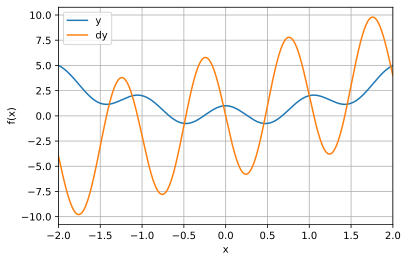

In [2]:
def fn(x):
    return (np.cos(2*np.pi*x) + x**2)

def derv(x):
    return (-2*np.pi*np.sin(2*np.pi*x) + 2*x)

x = np.linspace(-2,2,2001)
plt.plot(x,fn(x),x,derv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [3]:
#localmin = np.random.choice(x,1) 

localmin = np.array([0.]) # step 2
print("start point", localmin)

lr = 0.01 # learning rate
n = 100 # number of epochs

for i in range(n):
    grad = derv(localmin) # gradient is derivative of one x
    localmin -= grad*lr # new local minimum will keep shifting according to gradient
    # print(localmin)

localmin

start point [0.]


array([0.])

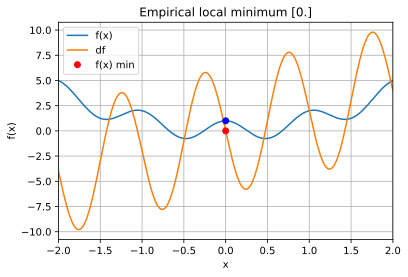

In [4]:
plt.plot(x,fn(x),x,derv(x))
plt.plot(localmin, derv(localmin), 'ro')
plt.plot(localmin, fn(localmin), 'bo')
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df', 'f(x) min'])
plt.title("Empirical local minimum {}".format(localmin))
plt.show()

start point [0.]


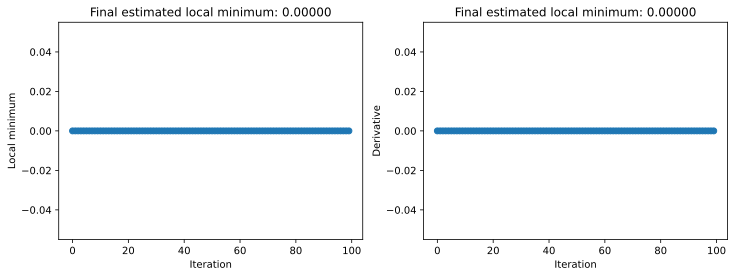

In [5]:
# storing the results in a list/array

# selecting 1 random starting point
# localmin = np.random.choice(x,1) 

localmin = np.array([0.]) # step 2
print("start point", localmin)

lr = .1 # learning rate
n = 100 # number of epochs

modelParam = np.zeros((n,2)) # n rows for each epoch, 2 columns matrix

for i in range(n):
    grad = derv(localmin) # gradient is derivative of one x
    localmin -= grad*lr # new local minimum will keep shifting according to gradient
    modelParam[i,:] = localmin #, grad # storing local min, and gradient of each local min for each epoch

fig, ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
    ax[i].plot(modelParam[:,i], 'o-')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f'Final estimated local minimum: {localmin[0]:0.5f}')
    
ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()             

The above situation occurs as when x = 0, then fn(x) = 0 and derivative deriv(x) is also 0.  
Hence the gradient descent algorithm also fails to update ```localmin``` value, keeping it to 0.   
This phenomena where the gradient becomes so tiny such that the local minima value does not update, is known as **vanishing gradient.** This happens very rarely in DL.

# Code Challenge : Gradient Descent in 2D : Gradient "Ascent"

Modify the code to go for Gradient Ascent and find the local maximum (There are at least two ways to do this). I have implemented only two ways here. Other one would be to change the learning rate to negative.

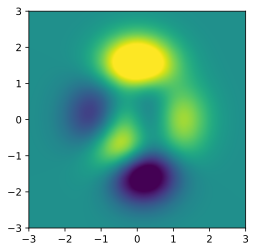

In [6]:
def peaks(x,y):
    
    x,y = np.meshgrid(x,y)
    
    z = 3*((1-x)**2)*np.exp(-(x**2)-(y+1)**2) \
        - 10*((x/5) - x**3 - y**5)*np.exp(-x**2 - y**2) \
        - (1/3)*(np.exp(-(x+1)**2 - y**2))
        
    return z

x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

plt.imshow(Z, extent = [x[0],x[-1],y[0],y[-1]], vmin = -5, vmax = 5, origin='lower')
plt.show()

In [7]:
import sympy as sym

sx, sy = sym.symbols('sx,sy')

sz = 3*((1-sx)**2)*sym.exp(-(sx**2)-(sy+1)**2) \
        - 10*((sx/5) - sx**3 - sy**5)*sym.exp(-sx**2 - sy**2) \
        - (1/3)*(sym.exp(-(sx+1)**2 - sy**2))

# creating functions
df_x = sym.lambdify((sx,sy), sym.diff(sz,sx), 'sympy')
df_y = sym.lambdify((sx,sy), sym.diff(sz,sy), 'sympy')


### First way
One way would be to add the gradient instead of subtracting it in the loop

Initial gradient: [-2.52885902102702 2.21752971075853]
[-0.00931758195995411 1.58136796293900] [1.00211448 1.12875157] [-8.32667268468867e-17 -3.34801630863524e-15]


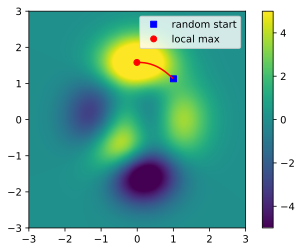

In [8]:
localmax = np.random.rand(2)*4-2 # creating two random points x,y between -2 to +2 
start = localmax[:] # making a copy
print("Initial gradient:", np.array([df_x(localmax[0],localmax[1]).evalf(), df_y(localmax[0],localmax[1]).evalf() ]))

lr = 0.01 # learning rate
n = 1000 # number of epochs

trajectory = np.zeros((n,2)) # trajectory of size training epochs*2
for i in range(n):
    grad = np.array([df_x(localmax[0],localmax[1]).evalf(), df_y(localmax[0],localmax[1]).evalf() ]) # gradient is derivative of one x
    localmax = localmax + grad*lr # Change from - to +
    trajectory[i,:] = localmax
    
print(localmax, start, grad)

plt.imshow(Z, extent = [x[0],x[-1],y[0],y[-1]], vmin = -5, vmax = 5, origin='lower')
plt.plot(start[0],start[1],'bs')
plt.plot(localmax[0],localmax[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['random start', 'local max'])
plt.colorbar()
plt.show()

### Second way

It would be to chage the sign of the function derivatives (in lamdify function)

Initial gradient: [1.38041506718968 -9.76680912642226]
[-0.00931758195995411 1.58136796293900] [0.25746928 0.92724589] [5.89805981832114e-17 3.34801630863524e-15]


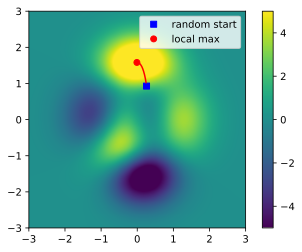

In [9]:
import sympy as sym

sx, sy = sym.symbols('sx,sy')

sz = 3*((1-sx)**2)*sym.exp(-(sx**2)-(sy+1)**2) \
        - 10*((sx/5) - sx**3 - sy**5)*sym.exp(-sx**2 - sy**2) \
        - (1/3)*(sym.exp(-(sx+1)**2 - sy**2))

# creating functions
df_x = sym.lambdify((sx,sy), sym.diff(-sz,sx), 'sympy') # change signs here
df_y = sym.lambdify((sx,sy), sym.diff(-sz,sy), 'sympy') # and here


localmax = np.random.rand(2)*4-2 # creating two random points x,y between -2 to +2 
start = localmax[:] # making a copy
print("Initial gradient:", np.array([df_x(localmax[0],localmax[1]).evalf(), df_y(localmax[0],localmax[1]).evalf() ]))

lr = 0.01 # learning rate
n = 1000 # number of epochs

trajectory = np.zeros((n,2)) # trajectory of size training epochs*2
for i in range(n):
    grad = np.array([df_x(localmax[0],localmax[1]).evalf(), df_y(localmax[0],localmax[1]).evalf() ]) # gradient is derivative of one x
    localmax = localmax - grad*lr 
    trajectory[i,:] = localmax
    
print(localmax, start, grad)

plt.imshow(Z, extent = [x[0],x[-1],y[0],y[-1]], vmin = -5, vmax = 5, origin='lower')
plt.plot(start[0],start[1],'bs')
plt.plot(localmax[0],localmax[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['random start', 'local max'])
plt.colorbar()
plt.show()

## Code Challenge - Gradient Descent : Fixed Vs Dynamic Learning

Think about how to change the learning rate (4 possibilities):
- Time (training epoch)
- Derivative
- Loss
- Current Local Min value

Implement and Test the idea in code.  
Think critically about how your code might fail

#### Approaches -
One possibility would be to change the learning rate or keeping it constant after reaching a certain number of epochs.  (or have a formula to update lr based on  training epochs).  
One would be to change the learning rate as the derivative or localmin reaches a threshold.( Or derive a formula again).  
One way would be to derive a formula b/w loss and learning rate.  

#### Fixed Learning

Below is the standard GD algorithm with fixed  learning rate:

[[ 3.75200000e-02 -2.95200000e+00  1.00000000e-02]
 [ 6.52688000e-02 -2.77488000e+00  1.00000000e-02]
 [ 9.13526720e-02 -2.60838720e+00  1.00000000e-02]
 ...
 [ 5.00000000e-01 -2.66453526e-15  1.00000000e-02]
 [ 5.00000000e-01 -2.66453526e-15  1.00000000e-02]
 [ 5.00000000e-01 -2.66453526e-15  1.00000000e-02]]


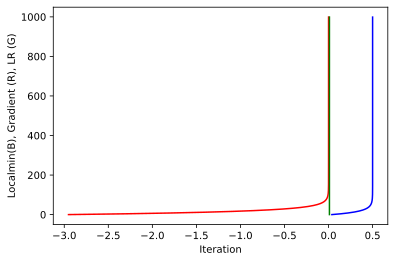

In [10]:
def fn(x):
    return 3*x**2 - 3*x + 4

def derv(x):
    return 6*x - 3


x = np.linspace(-2,2,2001)
lr = 0.01 # constant learning rate

modelParam = np.zeros((n,3)) # we will store localmin, gradient and learning rate

localmin = (np.random.choice(x,1))

n = 1000

for i in range(n):
    grad = derv(localmin)
    localmin = localmin - grad*lr
    modelParam[i,:] = localmin[0], grad[0], lr

print(modelParam)

plt.plot(modelParam[:,0],list(range(n)),'b-') # localmin
plt.plot(modelParam[:,1],list(range(n)),'r-') # gradient
plt.plot(modelParam[:,2],list(range(n)),'g-') # learning rate
plt.xlabel("Iteration")
plt.ylabel("Localmin(B), Gradient (R), LR (G)")
plt.show()

#### Dynamic Learning
**Approach** : Here, we will change the learning rate according to gradient.
We will update the learning rate in every epoch by multiplying it with absolute value of gradient at that iteration.  
The logic is that if the gradient is huge, then high lr gets us back to proper localmin, and if gradient is less, then learning rate will remain less to keep us in the localmin:

[[0.79989296 2.052      0.02052   ]
 [0.7334556  1.79935776 0.03692282]
 [0.66101101 1.40073357 0.05171904]
 ...
 [0.572641   0.43584602 0.        ]
 [0.572641   0.43584602 0.        ]
 [0.572641   0.43584602 0.        ]]


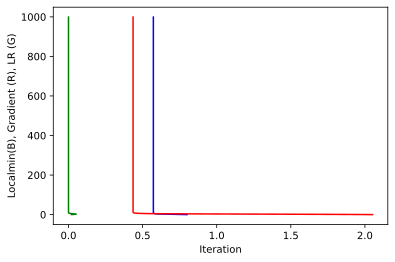

In [11]:
def fn(x):
    return 3*x**2 - 3*x + 4

def derv(x):
    return 6*x - 3


x = np.linspace(-2,2,2001)
lr = 0.01 # Initial learning rate

modelParam = np.zeros((n,3)) # we will store localmin, gradient and learning rate

localmin = np.random.choice(x,1)

n = 1000

for i in range(n):
    grad = derv(localmin)
    lr = lr*np.abs(grad) # update learning rate. Without abs(), lr may become negative, leading to gradient ascent
    localmin = localmin - grad*lr
    modelParam[i,:] = localmin[0], grad[0], lr[0]

print(modelParam)

plt.plot(modelParam[:,0],list(range(n)),'b-') # localmin
plt.plot(modelParam[:,1],list(range(n)),'r-') # gradient
plt.plot(modelParam[:,2],list(range(n)),'g-') # learning rate
plt.xlabel("Iteration")
plt.ylabel("Localmin(B), Gradient (R), LR (G)")
plt.show()

Another approach would be to change the learning rate as gradient approaches a threshold value. It is similar to above approach:

[[-5.9040000e-01 -6.9600000e+00  1.0000000e-02]
 [-5.2497600e-01 -6.5424000e+00  1.0000000e-02]
 [-4.6347744e-01 -6.1498560e+00  1.0000000e-02]
 ...
 [ 5.0000000e-01 -4.4408921e-16  5.0000000e-02]
 [ 5.0000000e-01 -4.4408921e-16  5.0000000e-02]
 [ 5.0000000e-01 -4.4408921e-16  5.0000000e-02]]


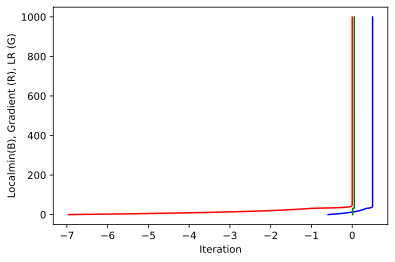

In [12]:
def fn(x):
    return 3*x**2 - 3*x + 4

def derv(x):
    return 6*x - 3


x = np.linspace(-2,2,2001)
lr = 0.01 # Initial learning rate

modelParam = np.zeros((n,3)) # we will store localmin, gradient and learning rate

localmin = np.random.choice(x,1)

n = 1000

for i in range(n):
    grad = derv(localmin)
    if -1 < grad < 1:
        lr = 0.05
    localmin = localmin - grad*lr
    modelParam[i,:] = localmin[0], grad[0], lr

print(modelParam)

plt.plot(modelParam[:,0],list(range(n)),'b-') # localmin
plt.plot(modelParam[:,1],list(range(n)),'r-') # gradient
plt.plot(modelParam[:,2],list(range(n)),'g-') # learning rate
plt.xlabel("Iteration")
plt.ylabel("Localmin(B), Gradient (R), LR (G)")
plt.show()

Another approach is to change the learning rate or keep it constant after a certain amount of epochs.

or other way to do is to keep decreasing lr while we approach the end of loop (i ~ n):

$$ lr = lr*\frac{i+1}{n}$$

Changing LR based on traininig epochs is known as **Learning rate decay**

[[ 0.0992   -6.012     0.1     ]
 [ 0.33968  -2.4048    0.1     ]
 [ 0.435872 -0.96192   0.1     ]
 ...
 [ 0.5       0.        0.05    ]
 [ 0.5       0.        0.05    ]
 [ 0.5       0.        0.05    ]]


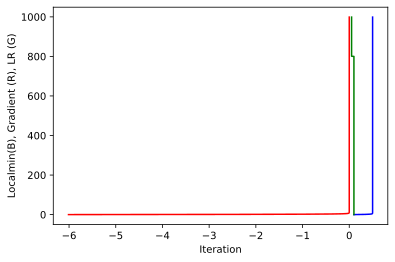

In [13]:
def fn(x):
    return 3*x**2 - 3*x + 4

def derv(x):
    return 6*x - 3


x = np.linspace(-2,2,2001)
lr = 0.1 # Initial learning rate

modelParam = np.zeros((n,3)) # we will store localmin, gradient and learning rate

localmin = np.random.choice(x,1)

n = 1000

for i in range(n):
    grad = derv(localmin)
    if i > 800:                  # keeping lr constant after 800 epochs
        lr = 0.05               # lr may or may not be constant before 800 epochs
    localmin = localmin - grad*lr
    modelParam[i,:] = localmin[0] , grad[0], lr

print(modelParam)

plt.plot(modelParam[:,0],list(range(n)),'b-') # localmin
plt.plot(modelParam[:,1],list(range(n)),'r-') # gradient
plt.plot(modelParam[:,2],list(range(n)),'g-') # learning rate
plt.xlabel("Iteration")
plt.ylabel("Localmin(B), Gradient (R), LR (G)")
plt.show()

## Code Challenge - ANNs : Manipulate regression slopes

Goal is to keep changing parameters to manipulate the slopes, and also learn the difference between data prediction and data relationships

In [18]:
import torch
import torch.nn as nn

def createData(m):
    N = 50
    x = torch.randn(N,1)
    y = m*x + torch.randn(N,1)/2 # generating ground truth as well
    return x, y

def ANN(x,y):
    
    # build the model
    ANNreg = nn.Sequential(
        nn.Linear(1,1), #input layer
        nn.ReLU(),      #activation function
        nn.Linear(1,1)  #output layer
    )

    # setting up metaparameters

    # learning rate
    lr = 0.05

    # loss function
    lossfn = nn.MSELoss()

    #optimizer - flavour of gradient descent to implement
    opt = torch.optim.SGD(ANNreg.parameters(), lr=lr) # SGD - Stochastic Gradient Descent

    # training the model

    n = 500 # number of epochs
    losses = torch.zeros(n)

    for i in range(n):

        # forward pass
        yHat = ANNreg(x) 

        # compute losses
        loss = lossfn(yHat,y) # this is the MSE used between yHat and y
        losses[i] = loss

        # backprop
        opt.zero_grad()
        loss.backward()
        opt.step()

    #final forward pass
    predictions = ANNreg(x)

    return predictions, losses

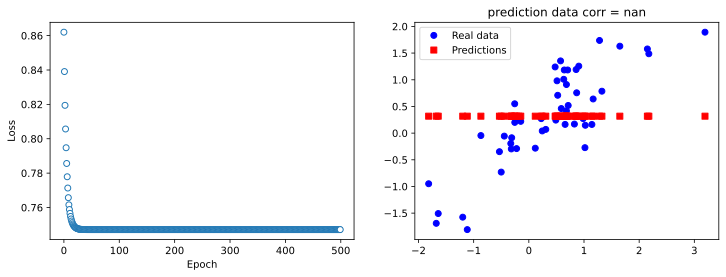

In [19]:
x, y = createData(0.8)

pred, losses = ANN(x,y)

fig, ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].plot(losses.detach(), 'o', markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')

ax[1].plot(x,y,'bo', label='Real data')
ax[1].plot(x,pred.detach(),'rs',label='Predictions')
ax[1].set_title(f'prediction data corr = {np.corrcoef(y.T,pred.detach().T)[0,1]:.2f}') #correlation coefficient
plt.legend()
plt.show()

In [16]:
m = np.linspace(-2,2,21)
numExp = 50
res = np.zeros((len(m), numExp, 2))

for i in range(len(m)):
    
    for n in range(numExp):
        x,y = createData(m[i])
        pred, loss = ANN(x,y)
        
        res[i,n,0] = loss[-1]
        res[i,n,1] = np.corrcoef(y.T, pred.detach().T)[0,1]


res[np.isnan(res)] = 0

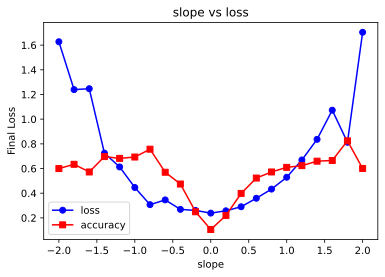

In [17]:
# l = np.array()
plt.plot(m,np.mean(res[:,:,0], axis=1),'bo-') # loss
plt.plot(m,np.mean(res[:,:,1], axis=1),'rs-') # accuracy
plt.title('slope vs loss')
plt.xlabel('slope')
plt.ylabel('Final Loss')
plt.legend(['loss','accuracy'])
plt.show()

# Code Challenge - Multi-output ANN and qwerties

Make a 3-output qwerties and train a 3-output ANN to classify them

In [20]:
# Creating Data

npc = 100 # 100 points per cluster 
blur = 1  # standard dev. to spread out the data

A = [1, 1]   # Centers of clusters
B = [3, -2]
C = [5, 1]

# Generating data
a = [A[0] + np.random.randn(npc)*blur, A[1] + np.random.randn(npc)*blur]
b = [B[0] + np.random.randn(npc)*blur, B[1] + np.random.randn(npc)*blur]
c = [C[0] + np.random.randn(npc)*blur, A[1] + np.random.randn(npc)*blur]

# True labels
labels = np.vstack((np.zeros((npc, 1)), np.ones((npc, 1)), np.ones((npc, 1))+1))

# Concatenating into a matrix
data = np.hstack((a,b,c)).T

# convert to tensor
labels = torch.tensor(labels).view(-1)
data = torch.tensor(data).float()

In [21]:
labels

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 

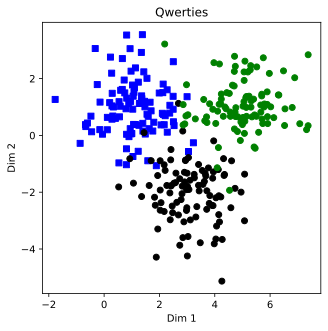

In [22]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.plot(data[np.where(labels==2)[0], 0], data[np.where(labels==2)[0], 1], 'go')
plt.title('Qwerties')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

In [23]:
# Defining a Multi-output ANN with 3 layers
QwertyANN = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.Softmax(dim=1)
)

# loss function and optimizers
lossfn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(QwertyANN.parameters(), lr = 0.01)

In [24]:
nEp = 10000
losses = torch.zeros(nEp)
accuracy = []

for i in range(nEp):
    
    yHat = QwertyANN(data)
#     print(labels.dtype)
#     break
    loss = lossfn(yHat, labels.long())
    losses[i] = loss.detach()
    
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    acc = 100*torch.mean((torch.argmax(yHat, axis=1) == labels).float())
    accuracy.append(acc)

pred = QwertyANN(data)
pred_labels = torch.argmax(pred, axis=1)
totalAcc = 100*torch.mean((pred_labels  == labels).float())

Final Accuracy : 95%


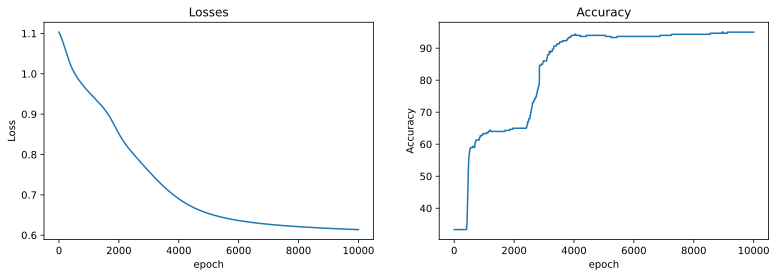

In [26]:

print('Final Accuracy : %g%%' %totalAcc)

fig, ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(accuracy)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')

plt.show()

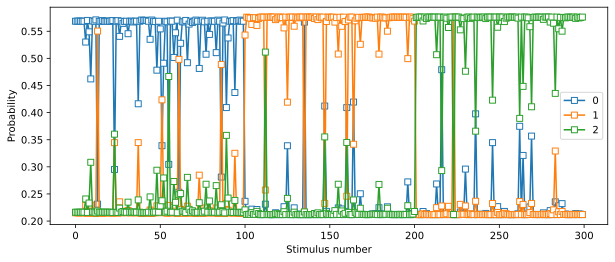

In [27]:
# visualizing softmax effect
sm = nn.Softmax(1)

fig = plt.figure(figsize=(10,4))

plt.plot(sm(yHat.detach()), 's-', markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['0', '1', '2'])
plt.show()

# Code Challenge - Converting nn.Sequential to class

Code in the previous challenge should be converted in class manner

In [28]:
# Creating Data

npc = 100 # 100 points per cluster 
blur = 1  # standard dev. to spread out the data

A = [1, 1]   # Centers of clusters
B = [3, -2]
C = [5, 1]

# Generating data
a = [A[0] + np.random.randn(npc)*blur, A[1] + np.random.randn(npc)*blur]
b = [B[0] + np.random.randn(npc)*blur, B[1] + np.random.randn(npc)*blur]
c = [C[0] + np.random.randn(npc)*blur, A[1] + np.random.randn(npc)*blur]

# True labels
labels = np.vstack((np.zeros((npc, 1)), np.ones((npc, 1)), np.ones((npc, 1))+1))

# Concatenating into a matrix
data = np.hstack((a,b,c)).T

# convert to tensor
labels = torch.tensor(labels).view(-1)
data = torch.tensor(data).float()

In [29]:
# # Defining a Multi-output ANN with 3 layers
# QwertyANN = nn.Sequential(
#     nn.Linear(2, 4),
#     nn.ReLU(),
#     nn.Linear(4, 4),
#     nn.ReLU(),
#     nn.Linear(4, 3),
#     nn.Softmax(dim=1)
# )

class QwertyANN(nn.Module):
    def __init__(self, ip):
        super().__init__()
        self.f1 = nn.Linear(ip, 4)  # ip layer
        self.f2 = nn.Linear(4, 4)  # hidden layer
        self.f3 = nn.Linear(4, 3)  # op layer
    
    def forward(self, x):
        x = self.f1(x)
        x = F.relu(x)
        x = self.f2(x)
        x = F.relu(x)
        x = self.f3(x)
#         x = nn.Softmax(dim=1)
        return x
        

model = QwertyANN(data.shape[1])

# loss function and optimizers
lossfn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr = 0.01)

In [30]:
nEp = 10000
losses = torch.zeros(nEp)
accuracy = []

for i in range(nEp):
    
    yHat = model(data)
#     print(labels.dtype)
#     break
    loss = lossfn(yHat, labels.long())
    losses[i] = loss.detach()
    
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    acc = 100*torch.mean((torch.argmax(yHat, axis=1) == labels).float())
    accuracy.append(acc)

pred = model(data)
pred_labels = torch.argmax(pred, axis=1)
totalAcc = 100*torch.mean((pred_labels  == labels).float())

Final Accuracy : 96%


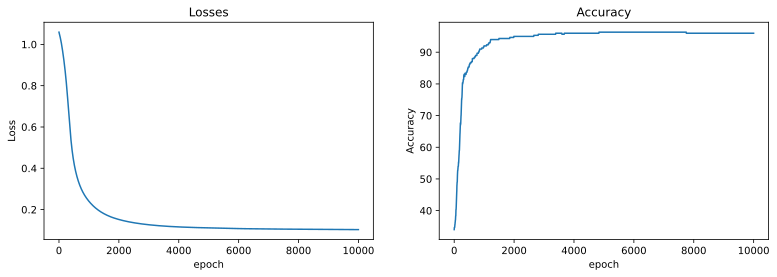

In [31]:
print('Final Accuracy : %g%%' %totalAcc)

fig, ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(accuracy)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')

plt.show()

# Code Challenge - Mini batches

In [44]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

# import dataset (comes with seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')

# organize the data

# convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa']   = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica']  = 2

# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, test_size=.2)


# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [45]:
# a function that creates the ANN model

def createANewModel():

    # model architecture
    ANNiris = nn.Sequential(
      nn.Linear(4,64),   # input layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,64),  # hidden layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,3),   # output units
        )

    # loss function
    lossfun = nn.CrossEntropyLoss()

    # optimizer
    optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.0005)

    return ANNiris,lossfun,optimizer

In [46]:
# train the model

# global parameter
numepochs = 500

def trainTheModel(ANNiris, lossfun, optimizer, train_loader, test_loader):

    # initialize accuracies as empties
    trainAcc = []
    testAcc  = []
    losses   = []

    # loop over epochs
    for epochi in range(numepochs):

    # loop over training data batches
        batchAcc  = []
        batchLoss = []
        for X,y in train_loader:

            # forward pass and loss
            yHat = ANNiris(X)
            loss = lossfun(yHat,y)

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # compute training accuracy just for this batch
            batchAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
            batchLoss.append( loss.item() )
            # end of batch loop...

        # now that we've trained through the batches, get their average training accuracy
        trainAcc.append( np.mean(batchAcc) )
        losses.append( np.mean(batchLoss) )

        # test accuracy
        X,y = next(iter(test_loader)) # extract X,y from test dataloader
        predlabels = torch.argmax( ANNiris(X),axis=1 )
        testAcc.append( 100*torch.mean((predlabels == y).float()).item() )

    # function output
    return trainAcc,testAcc,losses

In [47]:
def miniBatchExp(bs=16):
    train_loader = DataLoader(train_data,batch_size=bs,shuffle=True,drop_last=True)
    
    # create a model
    ANNiris,lossfun,optimizer = createANewModel()

    # train the model
    trainAcc,testAcc,losses = trainTheModel(ANNiris, lossfun, optimizer, train_loader, test_loader)
    
    return trainAcc, testAcc

In [48]:
bs = 2**np.arange(1,7)
train_acc = np.zeros((numepochs, len(bs)))
test_acc = np.zeros((numepochs, len(bs)))

In [49]:
for i in range(len(bs)):
#     print(type(int(bs[i])))
#     break
    tr, ts = miniBatchExp(int(bs[i]))
    train_acc[:, i] = tr
    test_acc[:, i] = ts

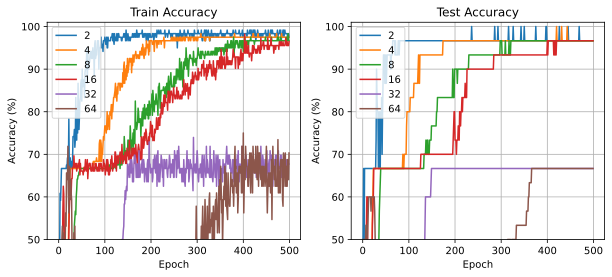

In [54]:
# plot the results
fig,ax = plt.subplots(1,2,figsize=(10, 4))


ax[0].plot(train_acc)
ax[0].set_title('Train Accuracy')
ax[1].plot(test_acc)
ax[1].set_title('Test Accuracy')


# common features
for i in range(2):
    ax[i].legend(bs)
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('Accuracy (%)')
    ax[i].set_ylim([50,101])
    ax[i].grid()

plt.show()